In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C://ML//data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [4]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
# Checking for missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [6]:
df=df.dropna()

In [7]:
# Double checking just to be sure

df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

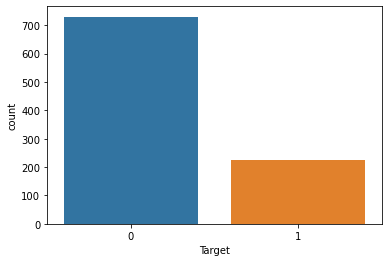

In [8]:
sns.countplot("Target",data=df)

---
## Exploratory Data Analysis

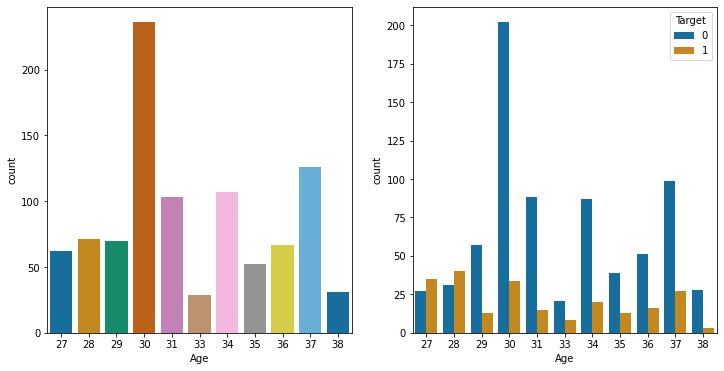

In [9]:
# Distribution of Age feature

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(data=df,x='Age',ax=axes[0],palette='colorblind')
sns.countplot(data=df,x='Age',hue='Target',ax=axes[1],palette='colorblind')
plt.show()

# Interesting to note: There are no 32 year olds who are represented in this dataset.

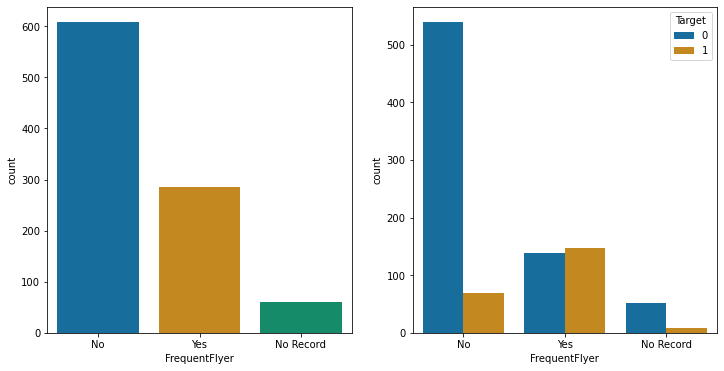

In [10]:
# Distribution of Frequent Flyer feature

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(data=df,x='FrequentFlyer',ax=axes[0],palette='colorblind')
sns.countplot(data=df,x='FrequentFlyer',hue='Target',ax=axes[1],palette='colorblind')
plt.show()

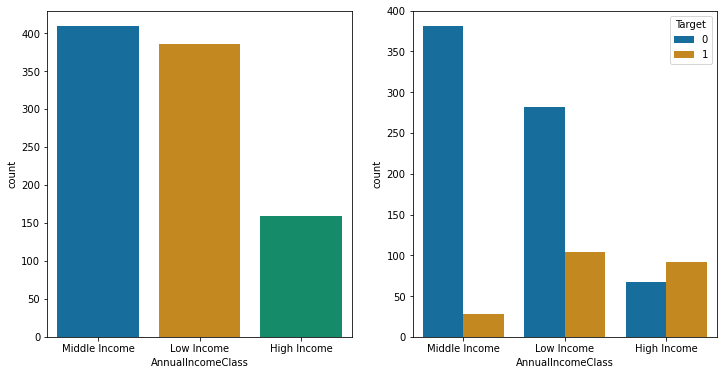

In [11]:
# Distribution of Annual Income Class Feature

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(data=df,x='AnnualIncomeClass',ax=axes[0],palette='colorblind')
sns.countplot(data=df,x='AnnualIncomeClass',hue='Target',ax=axes[1],palette='colorblind')
plt.show()

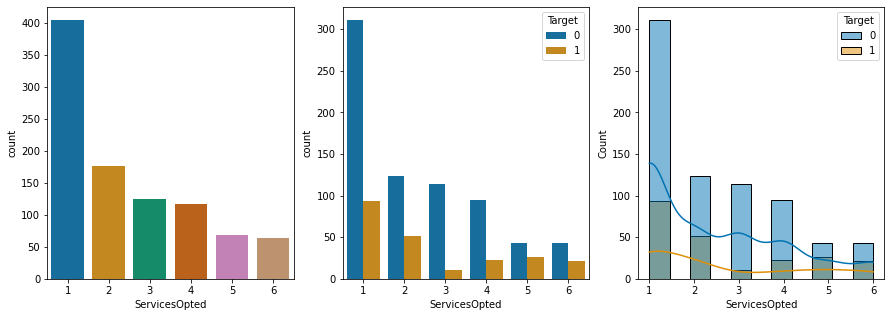

In [12]:
# Distribution of Services Opted Feature

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.countplot(data=df,x='ServicesOpted',ax=axes[0],palette='colorblind')
sns.countplot(data=df,x='ServicesOpted',hue='Target',ax=axes[1],palette='colorblind')
sns.histplot(data=df,x='ServicesOpted',hue='Target',kde=True,palette='colorblind',ax=axes[2])
plt.show()

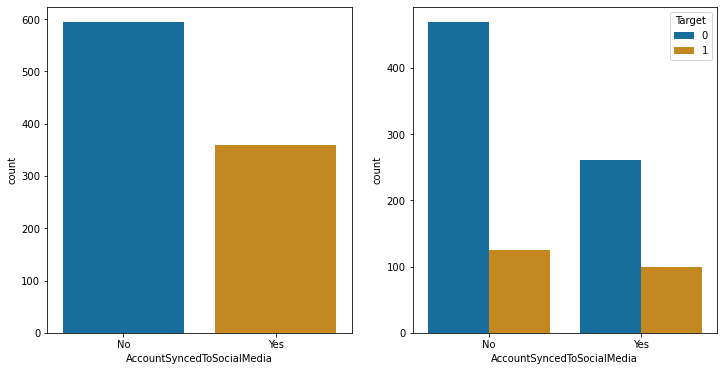

In [13]:
# Distribution of AccountSyncedToSocialMedia Feature

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(data=df,x='AccountSyncedToSocialMedia',ax=axes[0],palette='colorblind')
sns.countplot(data=df,x='AccountSyncedToSocialMedia',hue='Target',ax=axes[1],palette='colorblind')
plt.show()

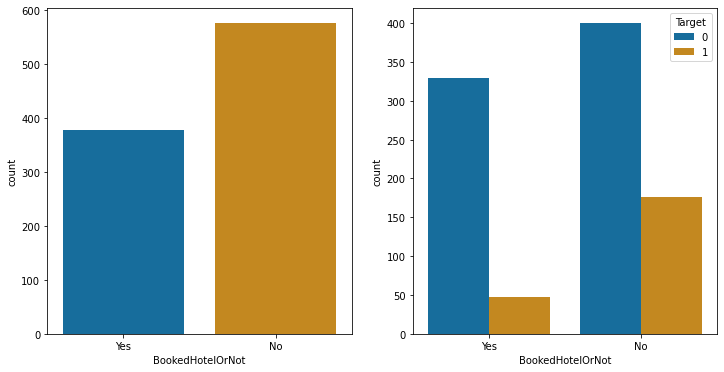

In [14]:
# Distribution of BookedHotelOrNot feature
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(data=df,x='BookedHotelOrNot',ax=axes[0],palette='colorblind')
sns.countplot(data=df,x='BookedHotelOrNot',hue='Target',ax=axes[1],palette='colorblind')
plt.show()

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [16]:
# Creating dummy variables for categorical features so we can create correlation plots, setting drop_first=True to avoid any
# issues with multicollinearity

df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,ServicesOpted,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
0,34,6,0,0,0,0,1,0,1
1,34,5,1,0,1,1,0,1,0
2,37,3,0,0,0,0,1,1,0
3,30,2,0,0,0,0,1,0,0
4,30,1,0,0,0,1,0,0,0


In [17]:
df.tail()

,Age,ServicesOpted,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
949,31,1,0,0,1,1,0,0,0
950,30,5,0,0,0,0,1,0,1
951,37,4,0,0,0,0,1,0,0
952,30,1,0,0,0,1,0,1,1
953,31,1,0,0,1,0,0,0,0


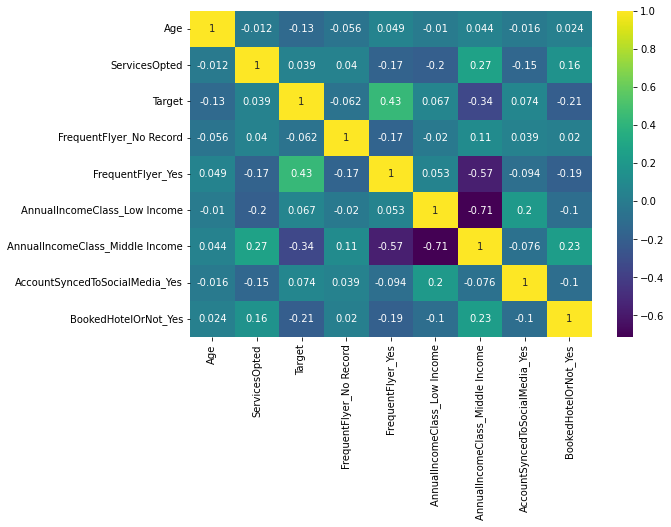

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(data=df.corr(),cmap='viridis',annot=True)
plt.show()

In [19]:
abs(df.corr()['Target']).sort_values(ascending=False)

Target                             1.000000
FrequentFlyer_Yes                  0.430973
AnnualIncomeClass_Middle Income    0.339959
BookedHotelOrNot_Yes               0.206055
Age                                0.131534
AccountSyncedToSocialMedia_Yes     0.073831
AnnualIncomeClass_Low Income       0.067348
FrequentFlyer_No Record            0.062015
ServicesOpted                      0.038646
Name: Target, dtype: float64

<AxesSubplot:xlabel='Target', ylabel='count'>

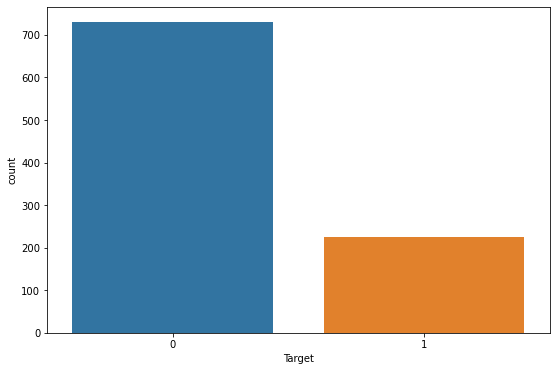

In [20]:
# Checking balance of target label

plt.figure(figsize=(9,6))
sns.countplot(data=df,x='Target')

In [21]:
# Label is pretty unbalanced. we will have to keep this in mind when developing
# the models
df['Target'].value_counts()

0    730
1    224
Name: Target, dtype: int64

In [22]:
df['FrequentFlyer_No Record']=df['FrequentFlyer_No Record'].astype(int)
df['FrequentFlyer_Yes']=df['FrequentFlyer_Yes'].astype(int)
df['AnnualIncomeClass_Low Income']=df['AnnualIncomeClass_Low Income'].astype(int)
df['AnnualIncomeClass_Middle Income']=df['AnnualIncomeClass_Middle Income'].astype(int)
df['AccountSyncedToSocialMedia_Yes']=df['AccountSyncedToSocialMedia_Yes'].astype(int)
df['BookedHotelOrNot_Yes']=df['BookedHotelOrNot_Yes'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 0 to 953
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              954 non-null    int64
 1   ServicesOpted                    954 non-null    int64
 2   Target                           954 non-null    int64
 3   FrequentFlyer_No Record          954 non-null    int32
 4   FrequentFlyer_Yes                954 non-null    int32
 5   AnnualIncomeClass_Low Income     954 non-null    int32
 6   AnnualIncomeClass_Middle Income  954 non-null    int32
 7   AccountSyncedToSocialMedia_Yes   954 non-null    int32
 8   BookedHotelOrNot_Yes             954 non-null    int32
dtypes: int32(6), int64(3)
memory usage: 84.5 KB


### Conclusion:
**1**. Frequent Flyer status has the highest correlation to whether or not the customer churns.

**2**. Being a frequent flyer and having high income are the two significant features where Churn exceeds Non-Churn. Intuitively, this makes sense. Someone with more money and who flys a lot is more likely to experiment with different travel companies if they have to travel a lot.

**3**. 27 and 28 year olds churn more than any other age group.

**4**. Overall, it appears that the more services that are opted, the lower the churn rate. It's interesting to explore because the churn rate is minimized at 3 services but starts to grow again after that point. But it seems to plateau and not get much higher.

**5**. People who don't book hotels churn more than those who do, and intuitively this just makes sense.

...

---
## Preprocessing

In [24]:
X = df.drop('Target',axis=1)
y = df['Target']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [26]:
y

0      0
1      1
2      0
3      0
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Target, Length: 954, dtype: int64

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Preliminary model inpspection using 1 neighbor
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

knn_pred = knn_model.predict(scaled_X_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

confusion_matrix(y_test,knn_pred)

array([[132,   6],
       [ 15,  38]], dtype=int64)

In [29]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       138
           1       0.86      0.72      0.78        53

    accuracy                           0.89       191
   macro avg       0.88      0.84      0.85       191
weighted avg       0.89      0.89      0.89       191



In [30]:
# Baseline with 1 neighbor performance isn't that great as expected. Going to graph the test error rates to see if the elbow method
# is appropriate
from sklearn.metrics import accuracy_score

In [31]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    knn_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1-accuracy_score(y_test,knn_pred_test)
    
    test_error_rates.append(test_error)

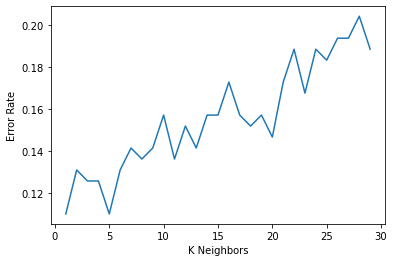

In [32]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.show()

In [33]:
# Using a pipeline which we will then use in a Grid Search

scaler = StandardScaler()
knn = KNeighborsClassifier()

In [34]:
from sklearn.pipeline import Pipeline

operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

In [35]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1,20))
param_grid = {'knn__n_neighbors':k_values}

full_knncv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_knncv_classifier.fit(X_train,y_train)

full_knn_pred = full_knncv_classifier.predict(X_test)

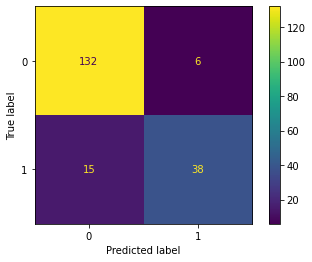

In [36]:
plot_confusion_matrix(full_knncv_classifier,X_test,y_test)

In [37]:
print(classification_report(y_test,full_knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       138
           1       0.86      0.72      0.78        53

    accuracy                           0.89       191
   macro avg       0.88      0.84      0.85       191
weighted avg       0.89      0.89      0.89       191



In [38]:
from sklearn.metrics import plot_roc_curve

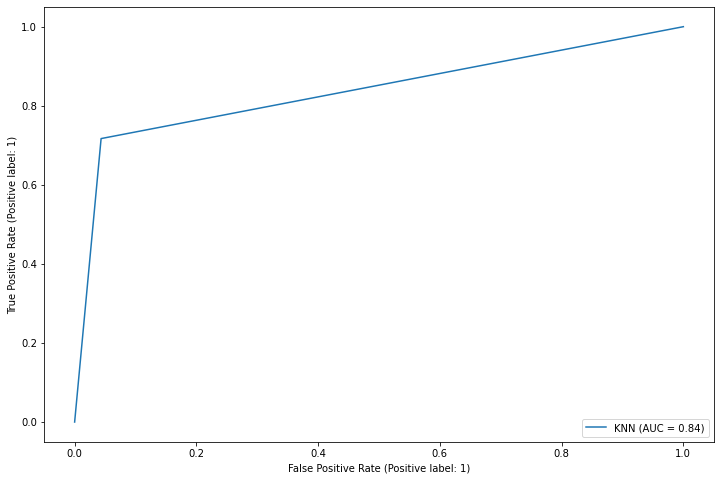

In [39]:
fig,ax=plt.subplots(figsize=(12,8))
plot_roc_curve(full_knncv_classifier,X_test,y_test,
               ax=ax,name='KNN')
plt.show()

Despite KNN performing well in a lot of classification scenarios, I believe that the largely imbalanced classes are affecting the recall of the '1' label. We will see how it performs using logistic regression.

---
## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [41]:
model.score(X,y)

0.8228511530398323

In [42]:
log_pred = model.predict([[34,5,0,1,1,0,1,0]])
log_pred

array([1], dtype=int64)

---
## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=8,min_samples_split=5,min_samples_leaf=1,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=5, random_state=42)

In [44]:
print("Training Score:",rf.score(X_train,y_train))
print("Testing Score:",rf.score(X_test,y_test))

Training Score: 0.9357798165137615
Testing Score: 0.8743455497382199


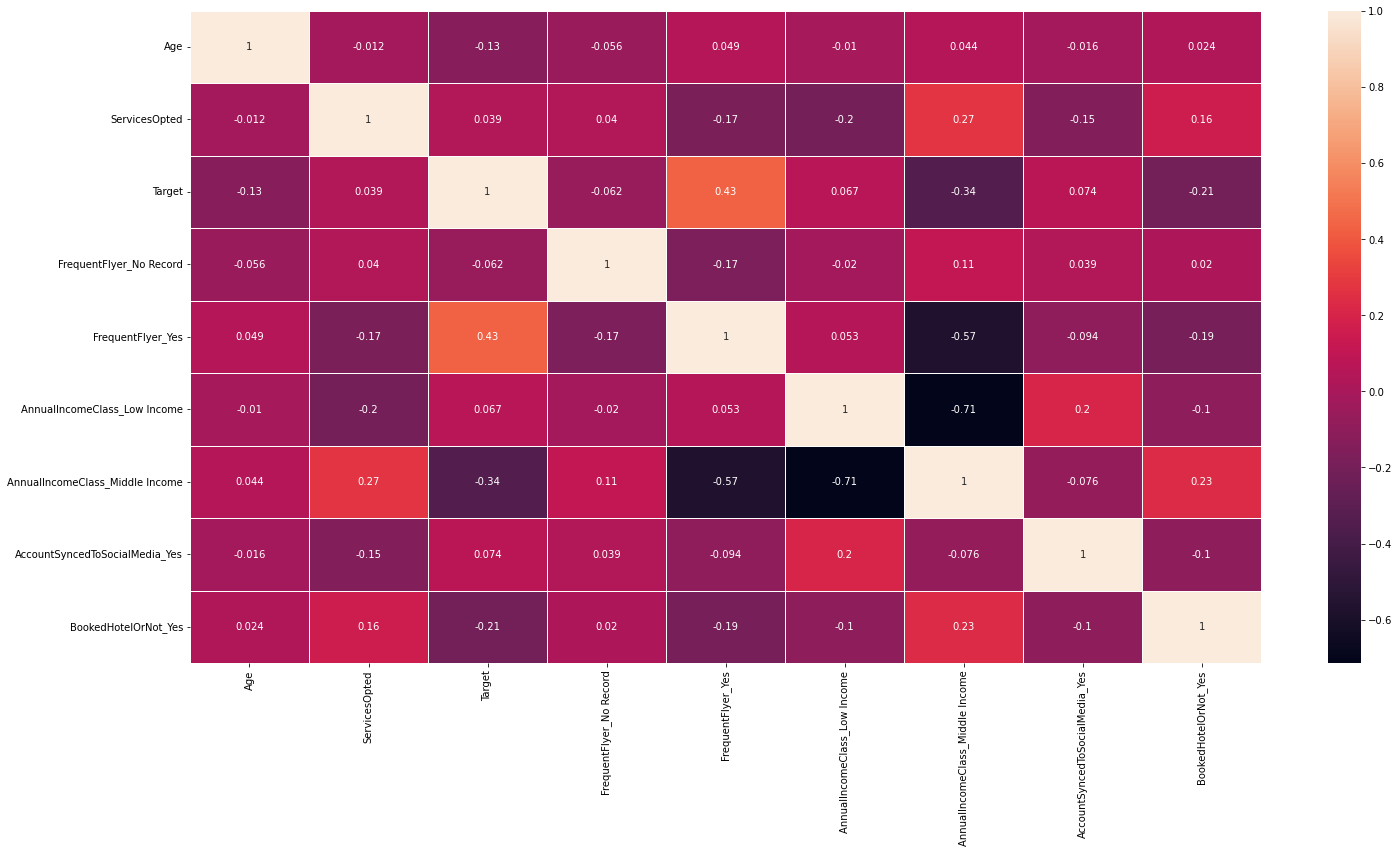

In [45]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

As expected, random forest is performing better than every other classifier at this point in time. Given the fact that the random forest model is the least likely to overfit, I feel it would be most appropriate to deploy this model over the rest.

In [47]:
import pickle

In [48]:
pickle.dump(model,open("travel_pred.pkl","wb"))